# Models Inverse Kinematics

## Imports

In [4]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from utils import dispIK_2R, dispIK_3R, Model, angular_loss

In [5]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                print(f"2R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_2R.append(model)
            elif '3R' in filename:
                print(f"3R Model found : {filename}")
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                MODELS_3R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")

3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN1_2R_p10_e20.keras
Number of 2R models : 1
Number of 3R models : 1


===== Step n°0 =====
Current Position: [0.00638577 0.14910242]
Intermediate joint angles: [0.7853982 1.5707964]

===== Step n°1 =====
Current Position: [-0.00017932  0.01300944]
Intermediate joint angles: [-0.49671775  3.0954196 ]

===== Step n°2 =====
Current Position: [0.02035464 0.01694565]
Intermediate joint angles: [-10.234138   3.387443]

===== Step n°3 =====
Current Position: [0.0717916  0.02546366]
Intermediate joint angles: [-11.015567    3.9360456]

===== Step n°4 =====
Current Position: [ 0.125771   -0.00457155]
Intermediate joint angles: [-11.743074    4.5236044]

===== Step n°5 =====
Current Position: [ 0.165095  -0.0077068]
Intermediate joint angles: [-11.971318   5.093366]

===== Step n°6 =====
Current Position: [ 0.14962146 -0.0025709 ]
Intermediate joint angles: [-11.847984   4.850966]

===== Step n°7 =====
Current Position: [1.4999118e-01 2.4572946e-06]
Intermediate joint angles: [-11.833249    4.8550124]

===== Step n°8 =====
Current Position: [1.5000001e-01 3.352761

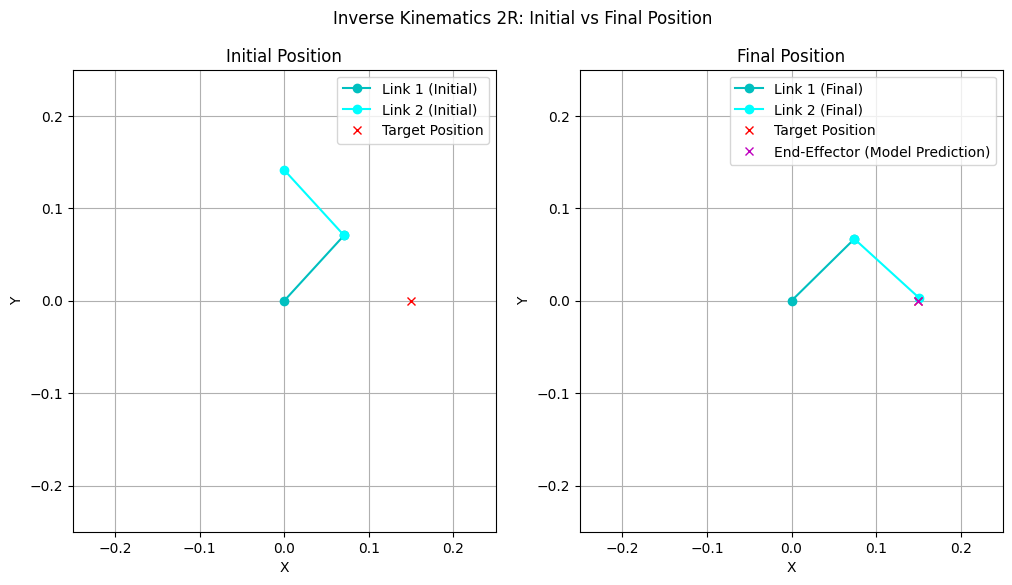

Distance error: 0.0030881755519658327



In [6]:
model_2R = MODELS_2R[0].model
name_2R = MODELS_2R[0].get_name()

if 'raw' in name_2R:
    raw = True
else: 
    raw = False
    
target_position = [0.15, 0] 
initial_guess = [np.pi/4, np.pi/2]  
dispIK_2R(model_2R, target_position, initial_guess, raw, display_error=True)

===== Step n°0 =====
Current Position: [ 0.25511757 -0.02566652]
Intermediate joint angles: [-0.7853982  0.5235988  0.7853982]

===== Step n°1 =====
Current Position: [0.15762018 0.11201902]
Intermediate joint angles: [-4.092255   4.2894583  5.7681727]

===== Step n°2 =====
Current Position: [-0.05532087  0.03244498]
Intermediate joint angles: [-1.6936293  4.3437967  4.6779366]

===== Step n°3 =====
Current Position: [-0.2205863  -0.04838357]
Intermediate joint angles: [-2.0652857  5.1572747  5.755082 ]

===== Step n°4 =====
Current Position: [-0.13288483  0.1292148 ]
Intermediate joint angles: [-2.5675797  4.802966   5.8603163]

===== Step n°5 =====
Current Position: [-0.19104907  0.07969939]
Intermediate joint angles: [-2.437484   4.9862995  5.9489017]

===== Step n°6 =====
Current Position: [-0.2006085   0.09844523]
Intermediate joint angles: [-2.5123024  5.0168147  5.968009 ]

===== Step n°7 =====
Current Position: [-0.19999938  0.09999924]
Intermediate joint angles: [-2.5152702  5

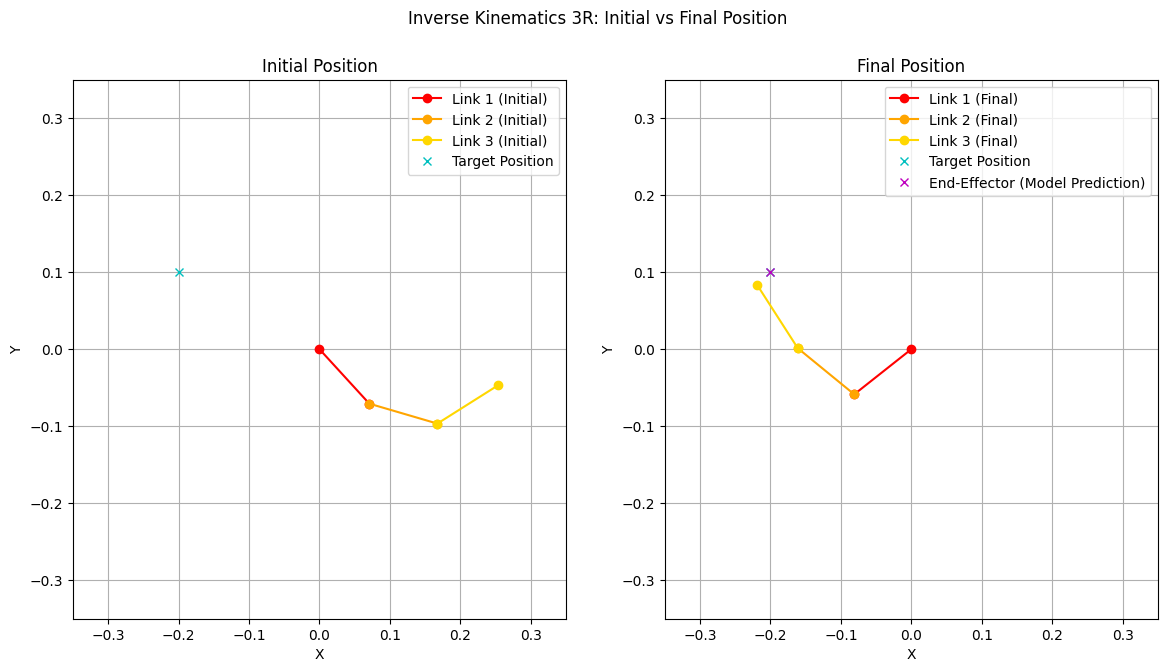

Distance error: 0.025087038055062294



In [7]:
model_3R = MODELS_3R[0].model
name_3R = MODELS_3R[0].get_name()

if 'raw' in name_3R:
    raw = True
else: 
    raw = False

target_position = [-0.2, 0.1] 
initial_guess = [-np.pi/4, np.pi/6, np.pi/4]  
dispIK_3R(model_3R, target_position, initial_guess, raw, display_error=True)